## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.149703 -0.738623 -0.763771  0.135615 -1.328190 -0.031488
1  1.331315  0.115163  1.007307 -1.575556  1.472707  0.440777
2  0.190248 -0.917488 -0.808113 -1.557797  0.177410 -1.332730
3 -0.720088 -0.946621  0.718407  0.433538  0.075256 -0.528591
4 -1.344808 -0.351703  1.709140 -1.224639 -0.724544 -1.231276


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9821564	total: 57.4ms	remaining: 57.3s
1:	learn: 0.9708548	total: 57.9ms	remaining: 28.9s
2:	learn: 0.9604679	total: 58.5ms	remaining: 19.4s
3:	learn: 0.9491037	total: 59.1ms	remaining: 14.7s
4:	learn: 0.9398324	total: 59.5ms	remaining: 11.8s
5:	learn: 0.9292662	total: 60ms	remaining: 9.94s
6:	learn: 0.9174303	total: 60.5ms	remaining: 8.59s
7:	learn: 0.9075803	total: 61.1ms	remaining: 7.57s
8:	learn: 0.8998216	total: 61.6ms	remaining: 6.78s
9:	learn: 0.8906301	total: 62.1ms	remaining: 6.15s
10:	learn: 0.8803134	total: 62.7ms	remaining: 5.64s
11:	learn: 0.8697870	total: 63.3ms	remaining: 5.21s
12:	learn: 0.8609846	total: 63.7ms	remaining: 4.84s
13:	learn: 0.8529755	total: 64.2ms	remaining: 4.52s
14:	learn: 0.8455103	total: 64.7ms	remaining: 4.25s
15:	learn: 0.8371139	total: 65.2ms	remaining: 4.01s
16:	learn: 0.8292038	total: 65.6ms	remaining: 3.79s
17:	learn: 0.8220956	total: 66.1ms	remaining: 3.61s
18:	learn: 0.8163946	total: 66.6ms	remaining: 

106:	learn: 0.3926391	total: 107ms	remaining: 891ms
107:	learn: 0.3900815	total: 107ms	remaining: 887ms
108:	learn: 0.3870258	total: 108ms	remaining: 881ms
109:	learn: 0.3840838	total: 108ms	remaining: 875ms
110:	learn: 0.3817453	total: 109ms	remaining: 870ms
111:	learn: 0.3789080	total: 109ms	remaining: 864ms
112:	learn: 0.3758698	total: 109ms	remaining: 859ms
113:	learn: 0.3734241	total: 110ms	remaining: 854ms
114:	learn: 0.3706968	total: 110ms	remaining: 849ms
115:	learn: 0.3679548	total: 111ms	remaining: 845ms
116:	learn: 0.3654788	total: 111ms	remaining: 840ms
117:	learn: 0.3627900	total: 112ms	remaining: 836ms
118:	learn: 0.3607908	total: 112ms	remaining: 831ms
119:	learn: 0.3583614	total: 113ms	remaining: 827ms
120:	learn: 0.3555332	total: 113ms	remaining: 823ms
121:	learn: 0.3529964	total: 114ms	remaining: 819ms
122:	learn: 0.3509515	total: 114ms	remaining: 815ms
123:	learn: 0.3488172	total: 115ms	remaining: 812ms
124:	learn: 0.3466038	total: 115ms	remaining: 807ms
125:	learn: 

271:	learn: 0.1322399	total: 186ms	remaining: 497ms
272:	learn: 0.1314226	total: 187ms	remaining: 498ms
273:	learn: 0.1307757	total: 187ms	remaining: 497ms
274:	learn: 0.1300413	total: 188ms	remaining: 495ms
275:	learn: 0.1289584	total: 188ms	remaining: 494ms
276:	learn: 0.1281827	total: 189ms	remaining: 493ms
277:	learn: 0.1272157	total: 189ms	remaining: 492ms
278:	learn: 0.1262780	total: 190ms	remaining: 490ms
279:	learn: 0.1255265	total: 190ms	remaining: 489ms
280:	learn: 0.1248413	total: 191ms	remaining: 488ms
281:	learn: 0.1241787	total: 191ms	remaining: 486ms
282:	learn: 0.1234172	total: 192ms	remaining: 485ms
283:	learn: 0.1226259	total: 192ms	remaining: 484ms
284:	learn: 0.1217583	total: 192ms	remaining: 483ms
285:	learn: 0.1209993	total: 193ms	remaining: 481ms
286:	learn: 0.1201571	total: 193ms	remaining: 480ms
287:	learn: 0.1193731	total: 194ms	remaining: 479ms
288:	learn: 0.1187929	total: 194ms	remaining: 478ms
289:	learn: 0.1180077	total: 195ms	remaining: 476ms
290:	learn: 

486:	learn: 0.0396797	total: 290ms	remaining: 305ms
487:	learn: 0.0394200	total: 290ms	remaining: 304ms
488:	learn: 0.0392471	total: 291ms	remaining: 304ms
489:	learn: 0.0390044	total: 291ms	remaining: 303ms
490:	learn: 0.0387632	total: 292ms	remaining: 302ms
491:	learn: 0.0385288	total: 292ms	remaining: 301ms
492:	learn: 0.0382956	total: 292ms	remaining: 301ms
493:	learn: 0.0380873	total: 293ms	remaining: 300ms
494:	learn: 0.0378622	total: 293ms	remaining: 299ms
495:	learn: 0.0376098	total: 294ms	remaining: 298ms
496:	learn: 0.0373619	total: 294ms	remaining: 298ms
497:	learn: 0.0371233	total: 295ms	remaining: 297ms
498:	learn: 0.0368900	total: 296ms	remaining: 297ms
499:	learn: 0.0366759	total: 296ms	remaining: 296ms
500:	learn: 0.0364145	total: 297ms	remaining: 295ms
501:	learn: 0.0362332	total: 297ms	remaining: 295ms
502:	learn: 0.0360765	total: 297ms	remaining: 294ms
503:	learn: 0.0359136	total: 298ms	remaining: 293ms
504:	learn: 0.0357078	total: 298ms	remaining: 292ms
505:	learn: 

651:	learn: 0.0173173	total: 369ms	remaining: 197ms
652:	learn: 0.0172169	total: 370ms	remaining: 197ms
653:	learn: 0.0171720	total: 370ms	remaining: 196ms
654:	learn: 0.0170749	total: 371ms	remaining: 195ms
655:	learn: 0.0170311	total: 371ms	remaining: 195ms
656:	learn: 0.0169368	total: 372ms	remaining: 194ms
657:	learn: 0.0168609	total: 372ms	remaining: 193ms
658:	learn: 0.0167801	total: 373ms	remaining: 193ms
659:	learn: 0.0167212	total: 373ms	remaining: 192ms
660:	learn: 0.0166152	total: 373ms	remaining: 192ms
661:	learn: 0.0165261	total: 374ms	remaining: 191ms
662:	learn: 0.0164428	total: 375ms	remaining: 190ms
663:	learn: 0.0163394	total: 375ms	remaining: 190ms
664:	learn: 0.0162534	total: 376ms	remaining: 189ms
665:	learn: 0.0161728	total: 376ms	remaining: 189ms
666:	learn: 0.0160718	total: 376ms	remaining: 188ms
667:	learn: 0.0159933	total: 377ms	remaining: 187ms
668:	learn: 0.0158943	total: 377ms	remaining: 187ms
669:	learn: 0.0158123	total: 378ms	remaining: 186ms
670:	learn: 

872:	learn: 0.0067423	total: 473ms	remaining: 68.8ms
873:	learn: 0.0067083	total: 473ms	remaining: 68.2ms
874:	learn: 0.0066721	total: 474ms	remaining: 67.7ms
875:	learn: 0.0066356	total: 474ms	remaining: 67.1ms
876:	learn: 0.0065998	total: 475ms	remaining: 66.6ms
877:	learn: 0.0065583	total: 475ms	remaining: 66ms
878:	learn: 0.0065285	total: 476ms	remaining: 65.5ms
879:	learn: 0.0064958	total: 476ms	remaining: 65ms
880:	learn: 0.0064637	total: 477ms	remaining: 64.4ms
881:	learn: 0.0064321	total: 477ms	remaining: 63.8ms
882:	learn: 0.0064034	total: 478ms	remaining: 63.3ms
883:	learn: 0.0063724	total: 478ms	remaining: 62.7ms
884:	learn: 0.0063371	total: 479ms	remaining: 62.2ms
885:	learn: 0.0063093	total: 479ms	remaining: 61.6ms
886:	learn: 0.0062751	total: 480ms	remaining: 61.1ms
887:	learn: 0.0062468	total: 480ms	remaining: 60.5ms
888:	learn: 0.0062167	total: 481ms	remaining: 60ms
889:	learn: 0.0061872	total: 481ms	remaining: 59.4ms
890:	learn: 0.0061535	total: 481ms	remaining: 58.9ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

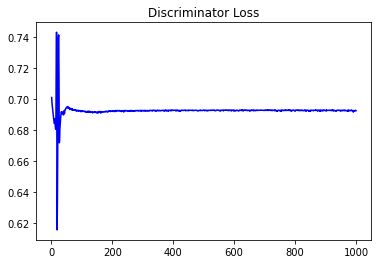

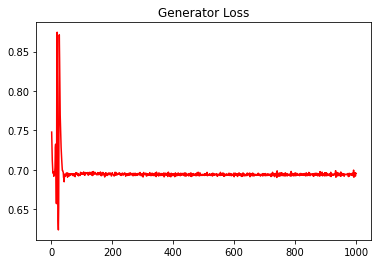

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.024417956571469515


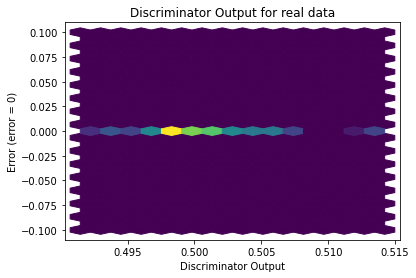

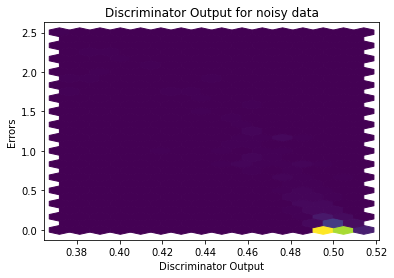

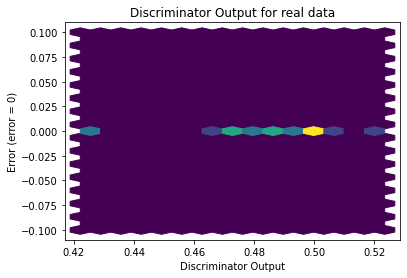

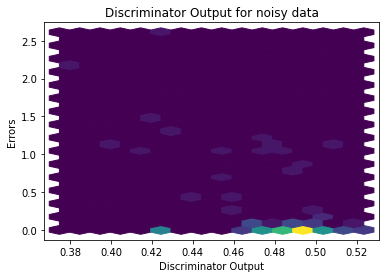

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


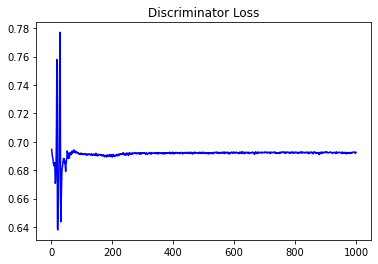

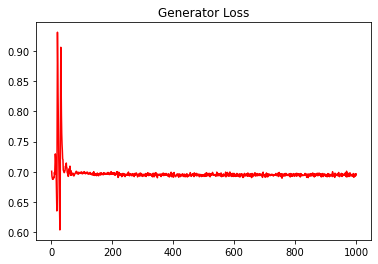

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.036321727444972265


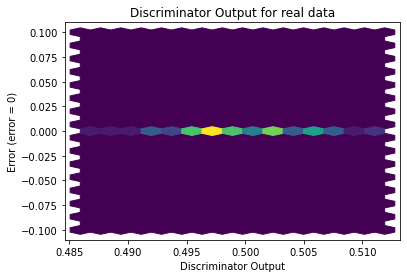

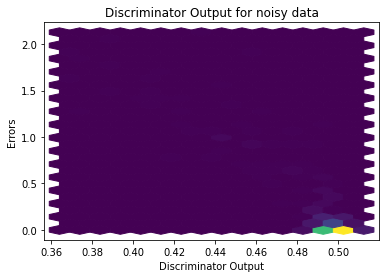

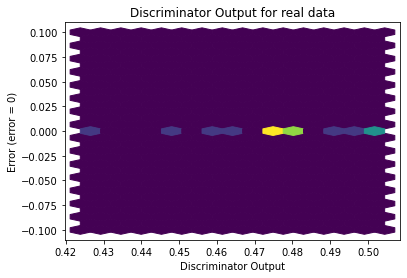

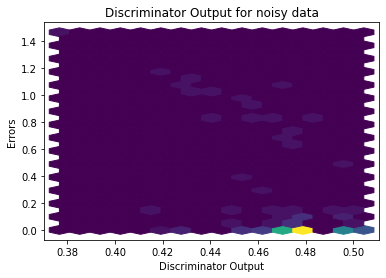

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8479]], requires_grad=True)
